In [12]:
#pip install diffusers transformers
!pip show diffusers transformers pillow accelerate

Name: diffusers
Version: 0.36.0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/diffusers/graphs/contributors)
Author-email: diffusers@huggingface.co
License: Apache 2.0 License
Location: d:\anaconda3\envs\yolov8\lib\site-packages
Requires: filelock, httpx, huggingface-hub, importlib_metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 
---
Name: transformers
Version: 4.46.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: d:\anaconda3\envs\yolov8\lib\site-packages
Requires: filelock, huggi

# 学习AI生图

### 先跑一个demo  

导入必备的包

In [35]:
# 关键：让matplotlib图嵌入notebook显示
%matplotlib inline
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image   #（这个就是pillow）
import accelerate
from diffusers import StableDiffusionPipeline

保证设备是GPU（CUDA）

In [14]:
#这一定要保证输出的是cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

下载模型到当前目录  
下载完看一下本地目录文件位置对不对，我的在./sd-v1-5-download/models--sd-legacy--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592里，请把里面所有文件剪切到./sd-v1-5-download/models--sd-legacy--stable-diffusion-v1-5

In [10]:
# 1. 定义下载目录（代码同目录的 sd-v1-5-download 文件夹）
# 相对路径（推荐）：./ 表示当前代码所在目录
download_dir = "./sd-v1-5-download"

# 2. 确保目录存在（如果不存在则自动创建）
os.makedirs(download_dir, exist_ok=True)

# 3. 加载模型时指定下载目录（核心：cache_dir 参数）
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    cache_dir=download_dir,  # 指定模型下载到当前目录
).to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

D:\anaconda3\envs\yolov8\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dr.Weiss\深度学习d2l\sd-v1-5-download\models--sd-legacy--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

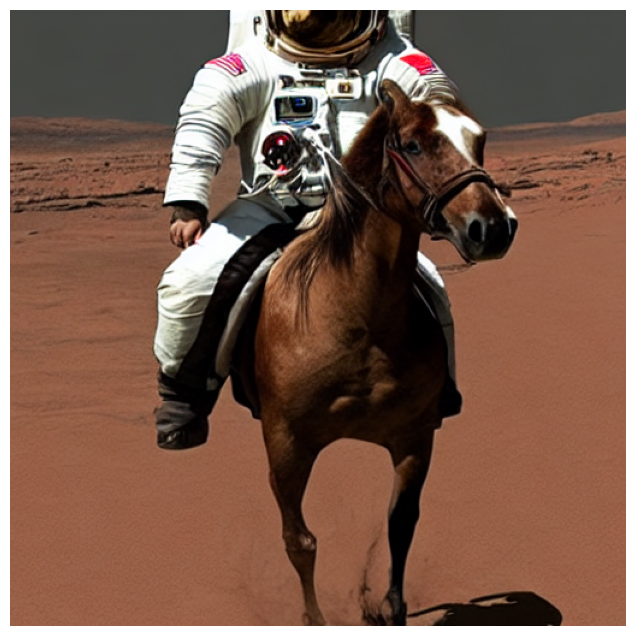

2155

In [31]:
# 加载模型
model_path = "./sd-v1-5-download/models--sd-legacy--stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

#优化效果（4G显存要用用）
from diffusers import EulerDiscreteScheduler
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

## 学习StableDiffusion 的使用

## 学习参数

prompt	               正向提示词：告诉 SD 要生成什么   
negative_prompt	       反向提示词：告诉 SD 不要生成什么   	   
num_inference_steps	   采样步数：反向扩散的迭代次数（UNet 去噪的次数）   	
guidance_scale (CFG)   文本引导尺度：控制图像贴合提示词的程度	   
height/width	       生成图像的尺寸（必须是 64 的倍数，SD 默认 512x512）   
generator	           随机数生成器：固定种子可复现相同图像   
batch_size             批量大小，一次生成的图片数量

标签超市：https://tags.novelai.dev/   
github：https://github.com/wfjsw/danbooru-diffusion-prompt-builder  

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

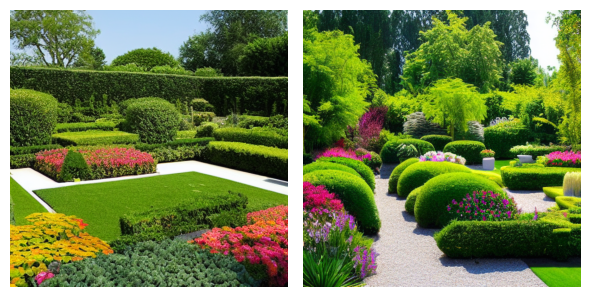

4112

In [47]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    safety_checker=None,              # 关闭安全检查器实例（支持NSFW）
    requires_safety_checker=False,    # 禁用安全检查器依赖
).to("cuda")

#优化效果（4G显存要用用）
from diffusers import EulerDiscreteScheduler
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

#正向提示词
prompt = "garden, masterpiece, best quality"
#反向提示词
negative_prompt = "bad anatomy, missing arms, bad hands, ponytail, lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 2
generator = torch.Generator("cuda").manual_seed(42)  # 固定种子

images = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    generator=generator  # 固定种子
).images

#画图可视化（2张图按2行1列展示）
fig, axes = plt.subplots(1, 2, figsize=(6, 6))  # 2行2列，画布大小12x12
axes = axes.flatten()                             # 把2x2的坐标轴转成一维列表，方便循环

# 循环显示每张图
for idx, img in enumerate(images):
    axes[idx].imshow(img)  # 显示图片
    axes[idx].axis("off")  # 隐藏坐标轴，更美观

# 调整子图间距，避免重叠
plt.tight_layout()
plt.show()


#清除显存占用
del pipe
torch.cuda.empty_cache()
import gc
gc.collect()

## 学习使用ControlNet 可控生图 的使用

## 学习LoRA微调

## StableDiffusion的详细实现

## 学习使用ComfyUI（可能写不到这上面来）